In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Pedigree'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

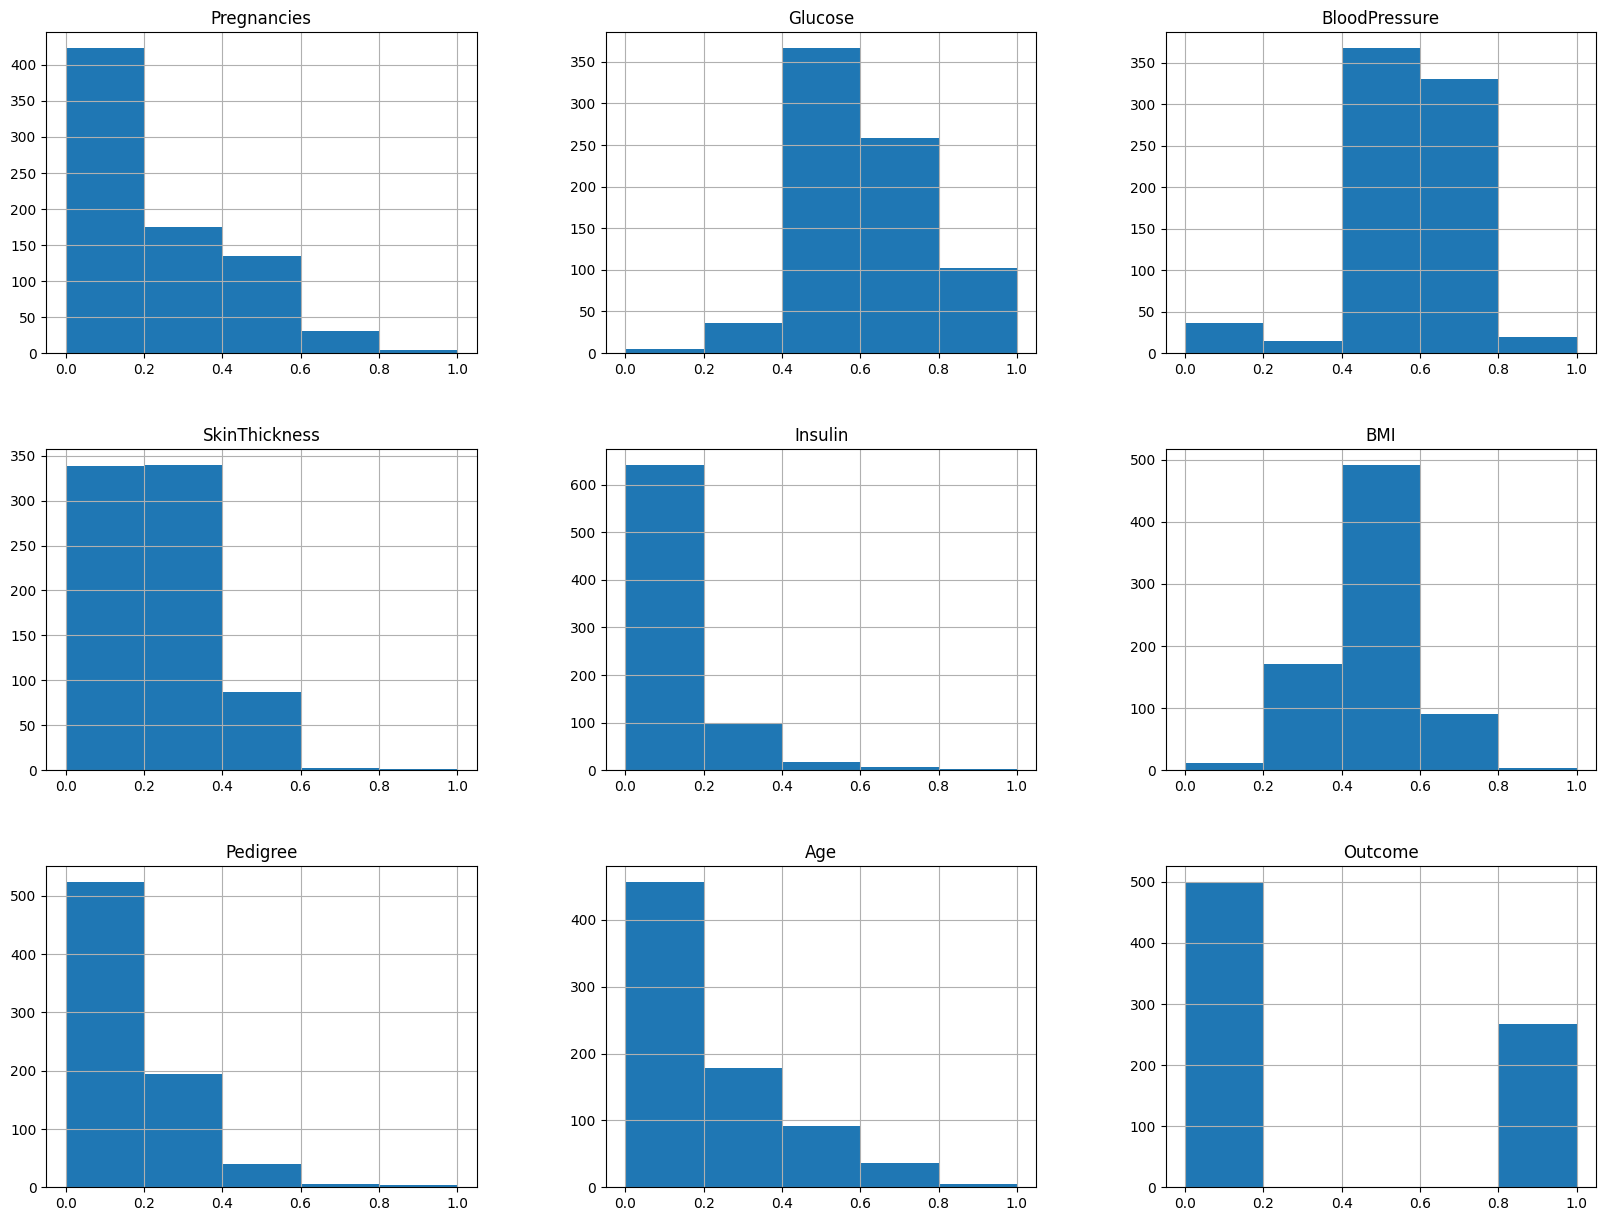

In [ ]:
data.hist(bins=5, figsize=(20,15))

Масштабирование

In [ ]:
def min_max_scaler(data):
  for column, item in data.items():
    data[column] = (data[column] - min(item)) / (max(item) - min(item))
  return data

In [ ]:
min_max_scaler(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


Разделение данных

In [ ]:
X = data.drop('Outcome', axis=1)
Y = data['Outcome']

In [ ]:
def train_test_split(X, Y):
  test_percent = 0.2
  random.seed(42)
  random.shuffle(list(range(len(X))))

  test_size = int(len(X) * test_percent)

  x_train = X[test_size:]
  x_test = X[:test_size]
  y_train = Y[test_size:]
  y_test = Y[:test_size]

  return x_train, x_test, y_train, y_test

Реализация KNN

In [ ]:
class KNN:

  def __init__(self, k=3):
    self.k = k

  def fit(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

  def predict(self, x_test):
    return np.array([self.predict_test(x) for x in x_test])

  def predict_test(self, x):
    dists = [np.sqrt(np.sum((x - x_train_idx)**2)) for x_train_idx in self.x_train]
    k_idx = np.argsort(dists)[:self.k]

    k_nearest_labels = [self.y_train[i] for i in k_idx]

    m_c = np.bincount(k_nearest_labels).argmax()

    return m_c



Модель 1 (признаки отбираются случайно)

In [ ]:
def accuracy_score(y_test, y_pred):
    correct_predictions = np.sum(y_test == y_pred)
    total_predictions = len(y_test)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
def random_features_knn(X, Y, k):
  selected_features = random.sample(list(X.columns), random.randint(2, len(X.columns)))
  new_data = X[selected_features]
  display(new_data.head())
  x_train, x_test, y_train, y_test = train_test_split(np.array(new_data), np.array(Y))

  knn = KNN(k=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)

  print("Оценка модели: ", accuracy_score(y_test, y_pred))

  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

,Insulin,Glucose,BMI,Pregnancies,BloodPressure
0,0.000000,0.743719,0.500745,0.352941,0.590164
1,0.000000,0.427136,0.396423,0.058824,0.540984
2,0.000000,0.919598,0.347243,0.470588,0.524590
3,0.111111,0.447236,0.418778,0.058824,0.540984
4,0.198582,0.688442,0.642325,0.000000,0.327869


Оценка модели:  0.7843137254901961


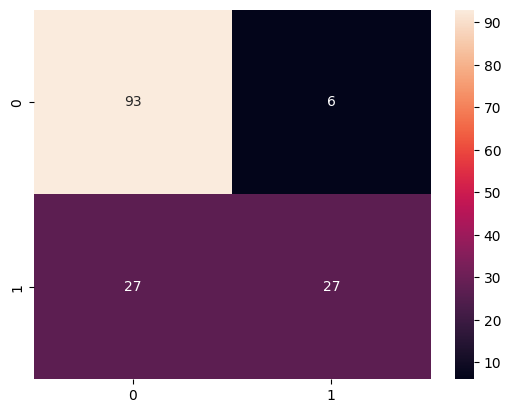

In [ ]:
random_features_knn(X, Y, 13)

,BloodPressure,SkinThickness,Glucose,Insulin,Age,Pedigree,BMI
0,0.590164,0.353535,0.743719,0.000000,0.483333,0.234415,0.500745
1,0.540984,0.292929,0.427136,0.000000,0.166667,0.116567,0.396423
2,0.524590,0.000000,0.919598,0.000000,0.183333,0.253629,0.347243
3,0.540984,0.232323,0.447236,0.111111,0.000000,0.038002,0.418778
4,0.327869,0.353535,0.688442,0.198582,0.200000,0.943638,0.642325


Оценка модели:  0.7581699346405228


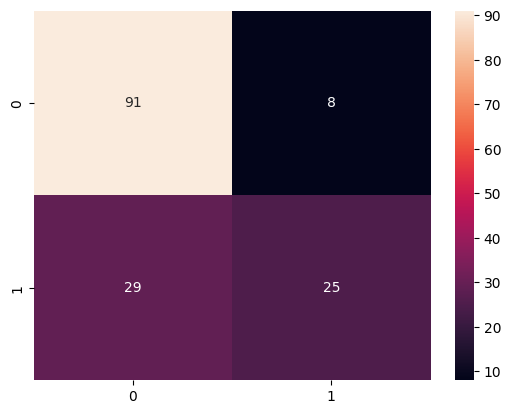

In [ ]:
random_features_knn(X, Y, 26)

,BloodPressure,SkinThickness,Glucose,Insulin,Age,Pedigree,BMI
0,0.590164,0.353535,0.743719,0.000000,0.483333,0.234415,0.500745
1,0.540984,0.292929,0.427136,0.000000,0.166667,0.116567,0.396423
2,0.524590,0.000000,0.919598,0.000000,0.183333,0.253629,0.347243
3,0.540984,0.232323,0.447236,0.111111,0.000000,0.038002,0.418778
4,0.327869,0.353535,0.688442,0.198582,0.200000,0.943638,0.642325


Оценка модели:  0.7516339869281046


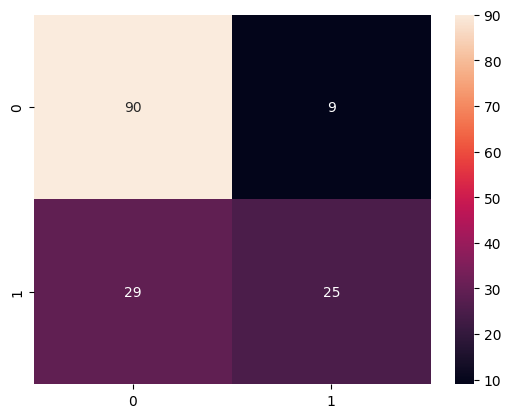

In [ ]:
random_features_knn(X, Y, 50)

Модель 2 (Фиксированный набор признаков, который выбирается заранее)


In [ ]:
import itertools
x_train, x_test, y_train, y_test = train_test_split(X, Y)
columns = list(x_train.columns)
combinations = itertools.combinations(columns, 2)

for i_column_name, j_column_name in combinations:
    data.plot.scatter(x=i_column_name, y=j_column_name, c='Outcome', colormap='rainbow', edgecolor='black');

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from itertools import combinations
def fix_features_knn(X, Y):
  x_train, x_test, y_train, y_test = train_test_split(X, Y)
  best_accuracy = 0
  best_feature_subset = []
  best_matrix=[]
  for subset in combinations(X.columns, 3):
    selected_features = list(subset)

    X_train_subset = np.array(x_train[selected_features].values)
    X_test_subset = np.array(x_test[selected_features].values)

    model_subset = KNN(k=3)
    model_subset.fit(X_train_subset, np.array(y_train))

    y_pred = model_subset.predict(X_test_subset)

    accuracy = accuracy_score(np.array(y_test), y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature_subset = selected_features
        best_matrix=confusion_matrix(np.array(y_test), y_pred)

  print(f"Лучший набор признаков: {best_feature_subset}")
  print(f"Точность: {best_accuracy}")
  sns.heatmap(best_matrix, annot=True)

Лучший набор признаков: ['Pregnancies', 'Glucose', 'Age']
Точность: 0.7647058823529411


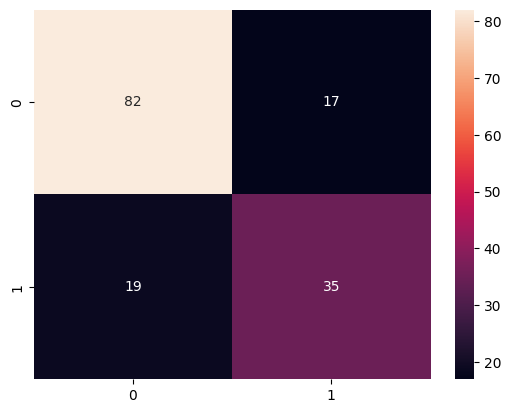

In [ ]:
fix_features_knn(X, Y)

In [2]:
arr=[4,5,8,9,3,2,1,1]
k=6
arr.sort()
r,l=0,0
mx=1
res=arr[0]
while r<len(arr):
  if arr[r]-arr[l]<=k:
    r+=1
  else:
    l+=1
  if mx<r-l:
    mx=r-l
    res=arr[l]
print(res)

1
